In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load in CSV file
Heart_df = pd.read_csv("cleaned_data.csv")
Heart_df.head()

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude
0,2020,AK,Kenai Peninsula,Cardiovascular Diseases,Heart Disease Mortality,165.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,Hispanic,60.193263,-150.280744
1,2020,AL,Walker County,Cardiovascular Diseases,Heart Disease Mortality,109.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Hispanic,33.810226,-87.297070
2,2020,AL,St. Clair County,Cardiovascular Diseases,Heart Disease Mortality,90.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Asian,33.716065,-86.314960
3,2020,FL,Polk County,Cardiovascular Diseases,Heart Disease Mortality,180.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,Hispanic,27.946050,-81.699391
4,2020,GA,Forsyth County,Cardiovascular Diseases,Heart Disease Mortality,133.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Asian,34.228391,-84.124685


In [3]:
remove_overall = pd.DataFrame(Heart_df.loc[(Heart_df["Ethnicity"]) != "Overall"])
remove_overall.head()

,Year,State,County,Class,Topic,Death_Rate(per M),Data_Value_Type,Gender,Ethnicity,Latitude,Longitude
0,2020,AK,Kenai Peninsula,Cardiovascular Diseases,Heart Disease Mortality,165.1,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,Hispanic,60.193263,-150.280744
1,2020,AL,Walker County,Cardiovascular Diseases,Heart Disease Mortality,109.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Hispanic,33.810226,-87.297070
2,2020,AL,St. Clair County,Cardiovascular Diseases,Heart Disease Mortality,90.0,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Asian,33.716065,-86.314960
3,2020,FL,Polk County,Cardiovascular Diseases,Heart Disease Mortality,180.2,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,Hispanic,27.946050,-81.699391
4,2020,GA,Forsyth County,Cardiovascular Diseases,Heart Disease Mortality,133.5,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Asian,34.228391,-84.124685


In [4]:
unique_counts = Heart_df["Ethnicity"].value_counts()
unique_counts

Ethnicity
Overall                                      9654
White                                        9385
Black                                        5488
Hispanic                                     4047
Asian                                        2234
American Indian or Alaska Native             1387
More than one race                           1046
Native Hawaiian or Other Pacific Islander     190
Name: count, dtype: int64

In [5]:
filtered_df = Heart_df[~Heart_df['Ethnicity'].str.contains('overall')]

print(filtered_df)

       Year State            County                    Class  \
0      2020    AK   Kenai Peninsula  Cardiovascular Diseases   
1      2020    AL     Walker County  Cardiovascular Diseases   
2      2020    AL  St. Clair County  Cardiovascular Diseases   
3      2020    FL       Polk County  Cardiovascular Diseases   
4      2020    GA    Forsyth County  Cardiovascular Diseases   
...     ...   ...               ...                      ...   
33426  2020    WA     Island County  Cardiovascular Diseases   
33427  2020    VA    Carroll County  Cardiovascular Diseases   
33428  2020    VA   Petersburg City  Cardiovascular Diseases   
33429  2020    VA  Lunenburg County  Cardiovascular Diseases   
33430  2020    WA   Kittitas County  Cardiovascular Diseases   

                         Topic  Death_Rate(per M)  \
0      Heart Disease Mortality              165.1   
1      Heart Disease Mortality              109.0   
2      Heart Disease Mortality               90.0   
3      Heart Diseas

In [6]:
print(filtered_df['Ethnicity'].nunique())

8


In [7]:
ethnicity_counts = filtered_df['Ethnicity'].value_counts()
ethnicity_counts

Ethnicity
Overall                                      9654
White                                        9385
Black                                        5488
Hispanic                                     4047
Asian                                        2234
American Indian or Alaska Native             1387
More than one race                           1046
Native Hawaiian or Other Pacific Islander     190
Name: count, dtype: int64

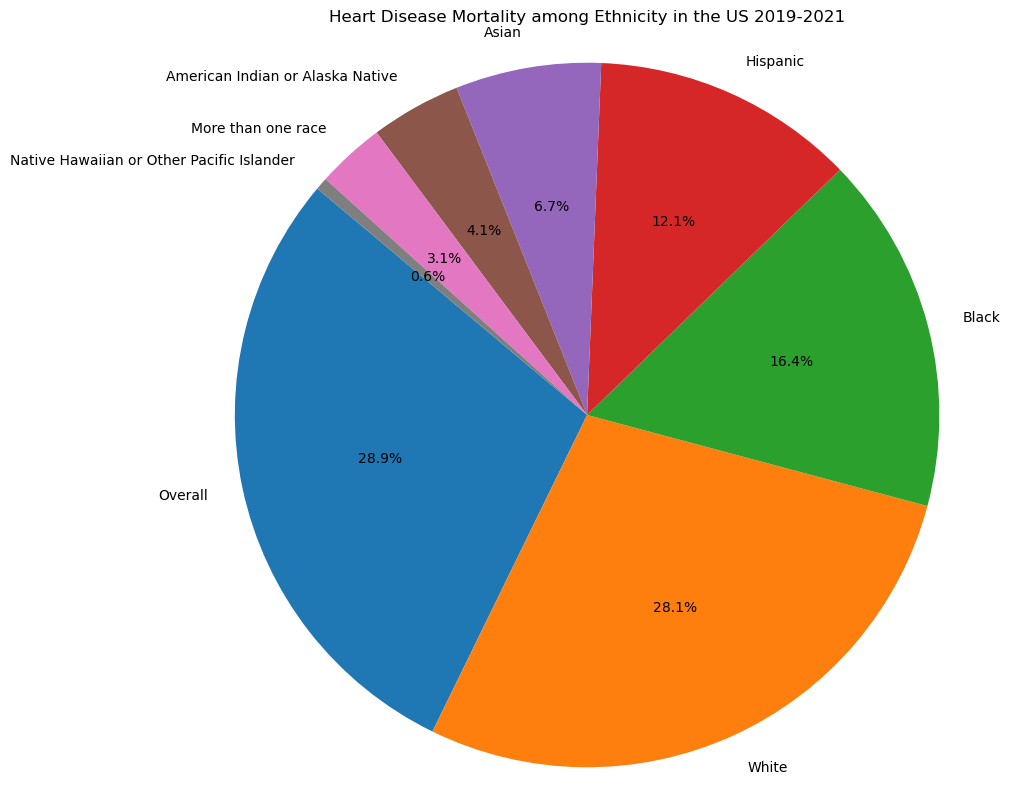

In [8]:

# Count occurrences of each ethnicity
ethnicity_counts = filtered_df['Ethnicity'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 10))  # Adjust the figure size if needed

# Plot the pie chart
plt.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title('Heart Disease Mortality among Ethnicity in the US 2019-2021')
plt.savefig('ethnicity1.png', dpi=300)
# Show the pie chart
plt.show()

In [9]:
mean = filtered_df['Death_Rate(per M)'].groupby(filtered_df['Ethnicity']).mean()

stat = pd.DataFrame({ "Mean":mean, }).sort_values(by="Mean", ascending=True)
stat

,Mean
Ethnicity,
Asian,171.487556
Hispanic,211.978799
More than one race,213.224952
Overall,369.041641
White,378.171934
American Indian or Alaska Native,407.148378
Native Hawaiian or Other Pacific Islander,449.335263
Black,474.084111


<Figure size 1200x1200 with 0 Axes>

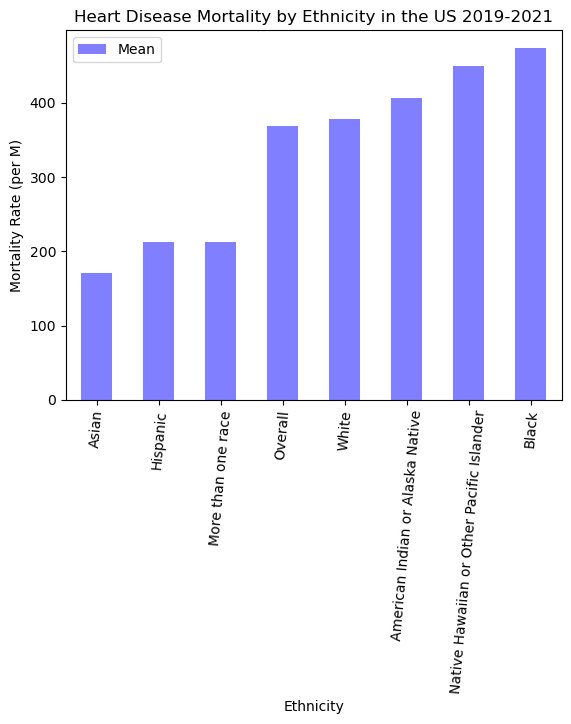

In [10]:
#Plot Gender

x_axis = mean.index.values
y_axis = mean.values
plt.figure(figsize=(12, 12))  # Adjust the figure size if needed
stat.plot(kind='bar', color='b', alpha=0.5, align="center")
plt.title("Heart Disease Mortality by Ethnicity in the US 2019-2021")
plt.xlabel("Ethnicity")
plt.ylabel("Mortality Rate (per M)")
plt.xticks(fontsize=10, rotation=85)
plt.savefig('ethnicity2.png', dpi=300)
plt.show()